# mathwriting dataset

In [12]:
import os
print(os.getcwd())

/home/rc/version-cv/sandbox


In [2]:
# Check .inkml LaTeX annotations
#!grep -i "<annotation" ~/version-cv/data/googleresearch/mathwriting-2025/train/0000fe986018f92a.inkml

  <annotation type="label">\binom{9}{4}</annotation>
  <annotation type="splitTagOriginal">train</annotation>
  <annotation type="inkCreationMethod">human</annotation>
  <annotation type="sampleId">0000fe986018f92a</annotation>
  <annotation type="normalizedLabel">(\begin{matrix}9\\ 4\end{matrix})</annotation>


In [13]:
with open("/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/0000fe986018f92a.inkml") as f:
    first_lines = [next(f) for _ in range(10)]
print("".join(first_lines))

<ink xmlns="http://www.w3.org/2003/InkML">
  <annotation type="label">\binom{9}{4}</annotation>
  <annotation type="splitTagOriginal">train</annotation>
  <annotation type="inkCreationMethod">human</annotation>
  <annotation type="sampleId">0000fe986018f92a</annotation>
  <annotation type="normalizedLabel">(\begin{matrix}9\\ 4\end{matrix})</annotation>
  <traceFormat>
    <channel name="X" type="decimal" />
    <channel name="Y" type="decimal" />
    <channel name="T" type="decimal" units="ms" />



In [28]:
from dataloader030 import parse_inkml
from pathlib import Path

inkml_dir = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train"

inkml_files = list(Path(inkml_dir).rglob("*.inkml"))
print("Total .inkml files found:", len(inkml_files))

# Check one file
sample_file = inkml_files[2]
print("Testing file:", sample_file)

parsed = parse_inkml(sample_file)
print("Parsed result:", parsed)

Total .inkml files found: 229864
Testing file: /home/rc/version-cv/data/googleresearch/mathwriting-2025/train/c5d2c2f96689546a.inkml
Parsed result: None


In [31]:
with open("/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/c5d2c2f96689546a.inkml", "r") as f:
    for _ in range(15):
        print(f.readline().strip())

<ink xmlns="http://www.w3.org/2003/InkML">
<annotation type="label">k(\omega)=n(\omega)\omega/c</annotation>
<annotation type="splitTagOriginal">train</annotation>
<annotation type="inkCreationMethod">human</annotation>
<annotation type="sampleId">c5d2c2f96689546a</annotation>
<annotation type="normalizedLabel">k(\omega)=n(\omega)\omega/c</annotation>
<traceFormat>
<channel name="X" type="decimal" />
<channel name="Y" type="decimal" />
<channel name="T" type="decimal" units="ms" />
</traceFormat>
<trace id="0">55.00 46.00 0.0,55.00 49.27 54.0,55.00 54.00 78.0,55.00 57.22 87.0,55.00 61.00 98.0,56.00 66.00 128.0,57.00 72.00 138.0,57.00 77.00 148.0,56.21 80.14 155.0,56.00 85.00 168.0,55.00 90.00 187.0,56.95 97.84 207.0,56.00 104.00 217.0,55.00 108.00 227.0,54.61 111.78 241.0,54.00 116.00 257.0,55.00 121.00 286.0,53.00 126.00 306.0,53.00 132.00 316.0,53.00 137.00 335.0,53.00 142.00 365.0,53.00 145.34 391.0,54.40 148.81 423.0,54.00 150.69 460.0</trace>
<trace id="1">59.00 123.00 857.0,61.00

In [32]:
inkml_files = list(Path(inkml_dir).rglob("*.inkml"))
print(f"Number of files found: {len(inkml_files)}")
print("First 5 files:")
for f in inkml_files[:5]:
    print(f)

Number of files found: 229864
First 5 files:
/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/5195d36eadd15cf2.inkml
/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/f398c07439939f1b.inkml
/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/c5d2c2f96689546a.inkml
/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/1dc04f9422e3844b.inkml
/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/29ddc75d56e65a83.inkml


In [43]:
from pathlib import Path
from lxml import etree

inkml_dir = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train"
inkml_files = list(Path(inkml_dir).rglob("*.inkml"))

print("Total .inkml files found:", len(inkml_files))

num_success = 0
num_failed = 0

for f in inkml_files[:100]:  # Check first 100 only to start
    try:
        tree = etree.parse(str(f))
        ns = {'ns': 'http://www.w3.org/2003/InkML'}
        normalized_elements = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)
        if normalized_elements and normalized_elements[0].text:
            num_success += 1
        else:
            num_failed += 1
    except Exception as e:
        num_failed += 1

print("Files with valid normalizedLabel:", num_success)
print("Files missing normalizedLabel or error:", num_failed)

Total .inkml files found: 229864
Files with valid normalizedLabel: 100
Files missing normalizedLabel or error: 0


In [39]:
from lxml import etree

file_path = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train/c5d2c2f96689546a.inkml"  # example file

tree = etree.parse(file_path)

# Check namespaces
print("Root tag:", tree.getroot().tag)
print("Namespace map:", tree.getroot().nsmap)

# Try pulling normalizedLabel directly
labels = tree.xpath('//annotation[@type="normalizedLabel"]')
print("Number of normalizedLabel annotations (without namespace):", len(labels))
if labels and labels[0].text:
    print("Sample normalizedLabel (no namespace):", labels[0].text.strip())
else:
    print("No normalizedLabel found without namespace.")

# Try with namespace (if any)
ns = {'ns': 'http://www.w3.org/2003/InkML'}
labels_ns = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)
print("Number of normalizedLabel annotations (with namespace):", len(labels_ns))
if labels_ns and labels_ns[0].text:
    print("Sample normalizedLabel (with namespace):", labels_ns[0].text.strip())
else:
    print("No normalizedLabel found with namespace.")

Root tag: {http://www.w3.org/2003/InkML}ink
Namespace map: {None: 'http://www.w3.org/2003/InkML'}
Number of normalizedLabel annotations (without namespace): 0
No normalizedLabel found without namespace.
Number of normalizedLabel annotations (with namespace): 1
Sample normalizedLabel (with namespace): k(\omega)=n(\omega)\omega/c


Total .inkml files found: 229864
Number of valid labels collected: 1000
First 5 labels:
\dot{r}=\frac{G}{2}\dot{v}
G=\int_{0}^{T}k(t)x(t)dt
k(\omega)=n(\omega)\omega/c
\lfloor\frac{1}{2}|V|\rfloor
x_{2}^{\prime}=\frac{x_{2}\cdot vq_{2}}{\sqrt{7\cdot\frac{v^{2}}{a^{2}}}}


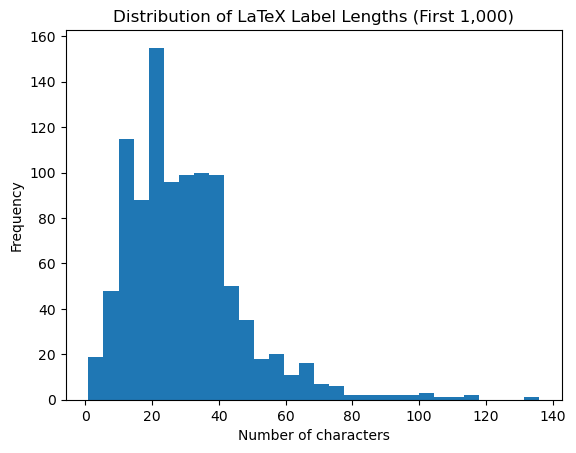

In [44]:
from pathlib import Path
from lxml import etree

inkml_dir = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train"
inkml_files = list(Path(inkml_dir).rglob("*.inkml"))

print("Total .inkml files found:", len(inkml_files))

final_labels = []

for f in inkml_files[:1000]:  # Process first 1000 files
    try:
        tree = etree.parse(str(f))
        ns = {'ns': 'http://www.w3.org/2003/InkML'}
        normalized_elements = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)
        label_text = None
        if normalized_elements and normalized_elements[0].text:
            label_text = normalized_elements[0].text.strip()
        else:
            label_elements = tree.xpath('//ns:annotation[@type="label"]', namespaces=ns)
            if label_elements and label_elements[0].text:
                label_text = label_elements[0].text.strip()
        if label_text:
            final_labels.append(label_text)
    except Exception as e:
        continue

print("Number of valid labels collected:", len(final_labels))
print("First 5 labels:")
for code in final_labels[:5]:
    print(code)

import matplotlib.pyplot as plt

if final_labels:
    lengths = [len(code) for code in final_labels]
    plt.hist(lengths, bins=30)
    plt.title("Distribution of LaTeX Label Lengths (First 1,000)")
    plt.xlabel("Number of characters")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No labels found to plot.")

Total .inkml files found: 229864
Number of valid samples: 1000
   label_length  num_traces  total_points  avg_points_per_trace
0            26          10           344             34.400000
1            24          22           474             21.545455
2            27          15           352             23.466667
3            28           8           198             24.750000
4            73          22           947             43.045455


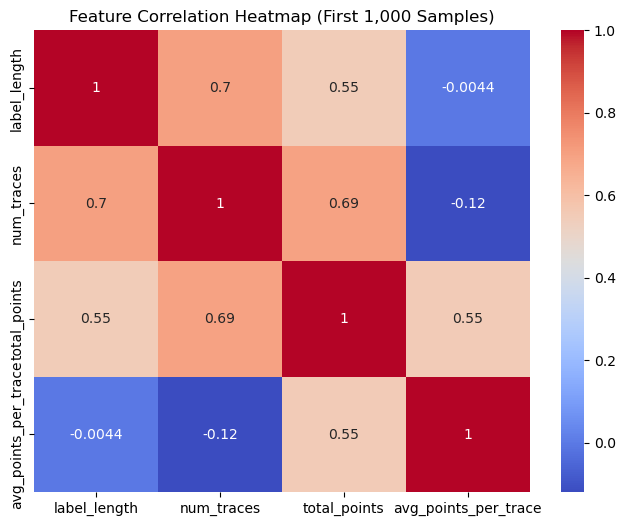

In [45]:
import pandas as pd
from pathlib import Path
from lxml import etree

inkml_dir = "/home/rc/version-cv/data/googleresearch/mathwriting-2025/train"
inkml_files = list(Path(inkml_dir).rglob("*.inkml"))

print("Total .inkml files found:", len(inkml_files))

records = []

for f in inkml_files[:1000]:  # Limit to first 1,000
    try:
        tree = etree.parse(str(f))
        ns = {'ns': 'http://www.w3.org/2003/InkML'}
        
        # Normalized label
        normalized_elements = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)
        label_text = None
        if normalized_elements and normalized_elements[0].text:
            label_text = normalized_elements[0].text.strip()
        else:
            label_elements = tree.xpath('//ns:annotation[@type="label"]', namespaces=ns)
            if label_elements and label_elements[0].text:
                label_text = label_elements[0].text.strip()

        if not label_text:
            continue

        # Traces
        trace_elements = tree.xpath('//ns:trace', namespaces=ns)
        num_traces = len(trace_elements)
        total_points = 0
        points_per_trace = []

        for trace in trace_elements:
            coords = trace.text.strip().split(',')
            num_points = len(coords)
            points_per_trace.append(num_points)
            total_points += num_points

        avg_points_per_trace = sum(points_per_trace) / num_traces if num_traces > 0 else 0

        records.append({
            "label_length": len(label_text),
            "num_traces": num_traces,
            "total_points": total_points,
            "avg_points_per_trace": avg_points_per_trace
        })
    except Exception as e:
        continue

print("Number of valid samples:", len(records))

df = pd.DataFrame(records)
print(df.head())

# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

if not df.empty:
    corr = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap (First 1,000 Samples)")
    plt.show()
else:
    print("No data to plot.")

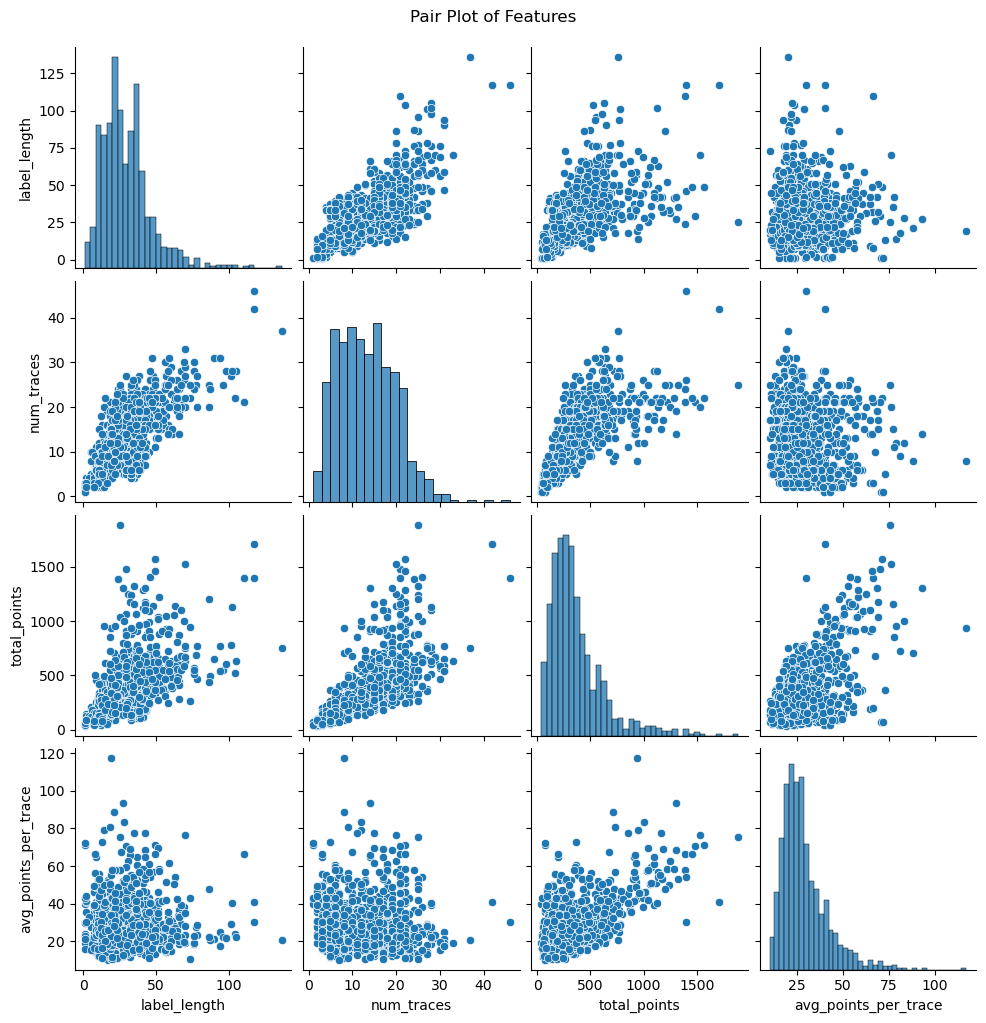

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

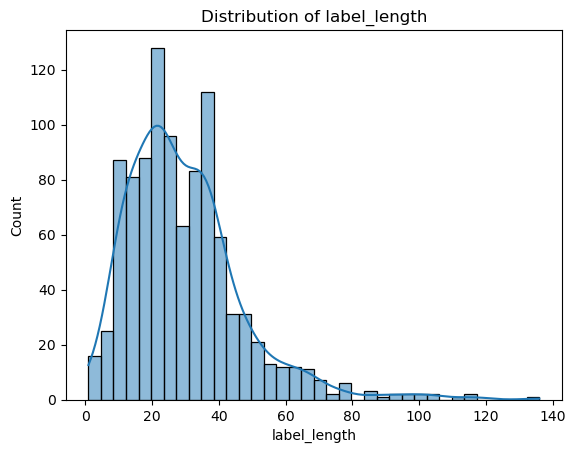

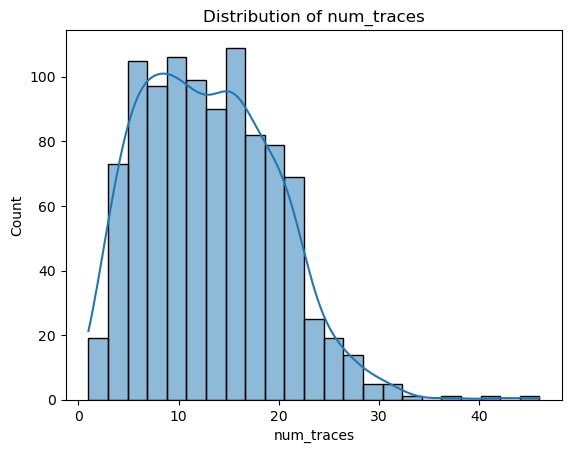

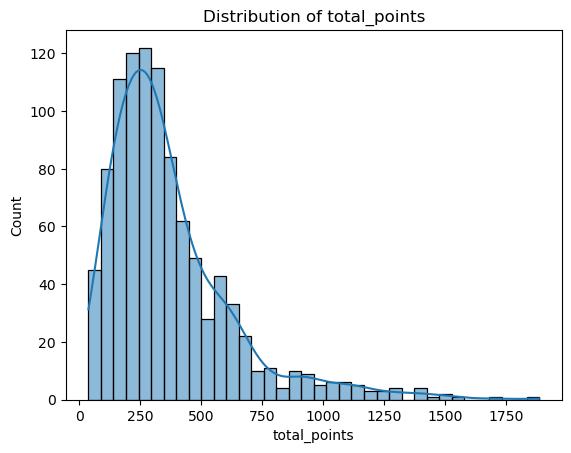

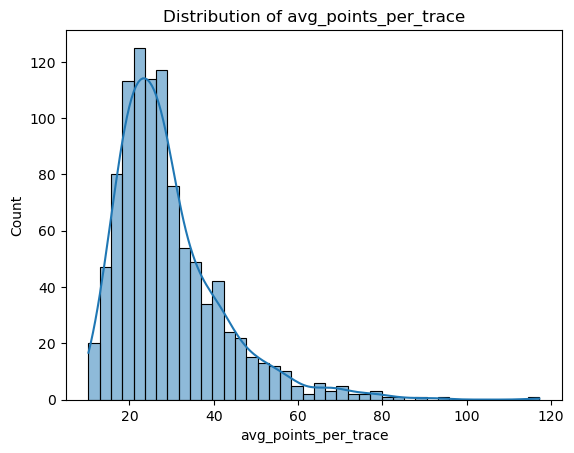

In [47]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [48]:
records = []

for f in inkml_files[:1000]:
    try:
        tree = etree.parse(str(f))
        ns = {'ns': 'http://www.w3.org/2003/InkML'}
        
        label = None
        normalized = None

        label_elements = tree.xpath('//ns:annotation[@type="label"]', namespaces=ns)
        if label_elements and label_elements[0].text:
            label = label_elements[0].text.strip()

        normalized_elements = tree.xpath('//ns:annotation[@type="normalizedLabel"]', namespaces=ns)
        if normalized_elements and normalized_elements[0].text:
            normalized = normalized_elements[0].text.strip()

        if not label and not normalized:
            continue

        label_len = len(label) if label else 0
        normalized_len = len(normalized) if normalized else 0
        diff_len = normalized_len - label_len

        records.append({
            "label_length": label_len,
            "normalized_length": normalized_len,
            "length_diff": diff_len
        })
    except:
        continue

df_label = pd.DataFrame(records)
print(df_label.head())

   label_length  normalized_length  length_diff
0            26                 26            0
1            23                 24            1
2            27                 27            0
3            29                 28           -1
4            69                 73            4


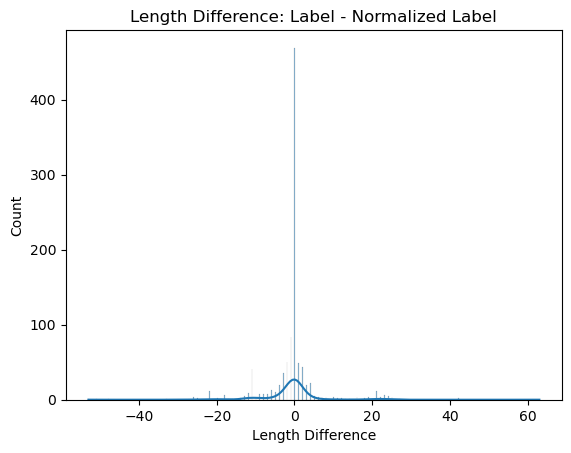

In [51]:
sns.histplot(df_label["length_diff"], kde=True)
plt.title("Length Difference: Label - Normalized Label")
plt.xlabel("Length Difference")
plt.show()

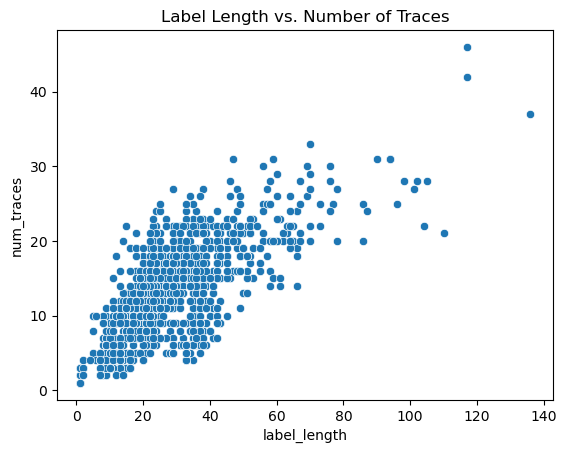

In [52]:
sns.scatterplot(x="label_length", y="num_traces", data=df)
plt.title("Label Length vs. Number of Traces")
plt.show()

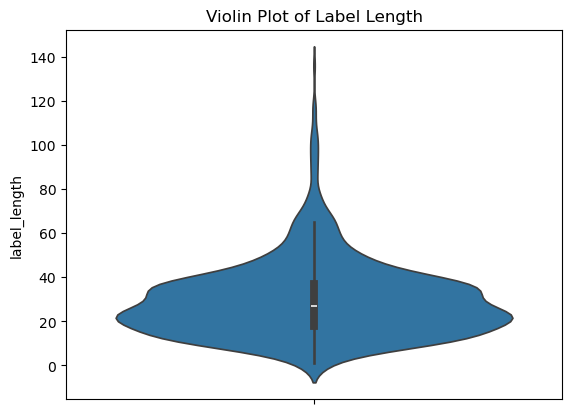

In [53]:
sns.violinplot(y="label_length", data=df)
plt.title("Violin Plot of Label Length")
plt.show()

In [ ]:
# end of mathwriting eda feasibility test runs